<!-- n-ppe dataset sample image](https://github.com/ultralytics/docs/releases/download/0/construction-ppe-dataset-sample.avif) -->

<img src="https://github.com/ultralytics/docs/releases/download/0/construction-ppe-dataset-sample.avif" alt="Construction-ppe dataset sample image" width="600" />

# Construction PPE Detection using Ultralytics YOLO11

This notebook serves as an initial step for training the YOLO11 model on the [construction-ppe](https://docs.ultralytics.com/datasets/detect/construction-ppe/) detection dataset.

<mark>
This notebook is derived from <a href="https://docs.ultralytics.com/datasets/detect/construction-ppe/">This Ultralytics Notebook</a> with the added functinality that it demonstrates how to identify people not wearing a vest.<br>
New content is highlighted yellow</mark>

<a href="https://github.com/ultralytics/ultralytics">YOLO11</a> is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. We hope the resources in this notebook help you get the most out of YOLO11. Please see the YOLO11 <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussion.</div>

## Dataset Structure

The construction-ppe dataset is divided into three subsets:

- **Training set**: Consisting of 1132 images, each accompanied by corresponding annotations.
- **Validation set**: Comprising 143 images, with annotations paired for each one.
- **Testing set**: Comprising 141 images, with annotations paired for each one.

## Applications

Construction-PPE detection using computer vision improves workplace safety and compliance. By analyzing site footage, AI systems check if workers wear helmets, vests, or gloves, enabling real-time monitoring and instant alerts. These systems can also provide safety analytics, support drone or robot inspections, and serve as valuable tools for research and education in workplace safety.

## Setup

Install the `ultralytics` package and dependencies (see the [pyproject.toml](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml)), then verify your software and hardware.


In [4]:
# !pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.207 🚀 Python-3.11.13 torch-2.8.0+cu128 CUDA:0 (NVIDIA A100-SXM4-80GB, 81153MiB)
Setup complete ✅ (256 CPUs, 502.9 GB RAM, 28.4/69.9 GB disk)


## Dataset YAML File

A YAML (Yet Another Markup Language) file defines the dataset configuration, including paths, classes, and other pertinent details. 😀

```yaml
# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# Construction-PPE dataset by Ultralytics
# Documentation: https://docs.ultralytics.com/datasets/detect/construction-ppe/
# Example usage: yolo train data=construction-ppe.yaml
# parent
# ├── ultralytics
# └── datasets
#     └── construction-ppe ← downloads here (178.4 MB)

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: construction-ppe # dataset root dir
train: images/train # train images (relative to 'path') 1132 images
val: images/val # val images (relative to 'path') 143 images
test: images/test # test images (relative to 'path') 141 images

# Classes
names:
  0: helmet
  1: gloves
  2: vest
  3: boots
  4: goggles
  5: none
  6: Person
  7: no_helmet
  8: no_goggle
  9: no_gloves
  10: no_boots

# Download script/URL (optional)
download: https://github.com/ultralytics/assets/releases/download/v0.0.0/construction-ppe.zip
```

## Train

Train YOLO11 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLO11 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [10]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="construction-ppe.yaml", epochs=5, imgsz=640)

Ultralytics 8.3.207 🚀 Python-3.11.13 torch-2.8.0+cu128 CUDA:0 (NVIDIA A100-SXM4-80GB, 81153MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=construction-ppe.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

## <mark>Original image to predict on

In [ ]:
!wget https://raw.githubusercontent.com/CNUClasses/471_code/master/week7/ppe-inference-missingvest.png .

9512.80s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
bus.jpg		 ppe-inference-im0.png		runs
bus.jpg.1	 ppe-inference-im0.png.1	yolo11n.pt
datasets	 ppe-inference-missingvest.png	yolov11_demo.ipynb
demo_yolo.ipynb  ppe_yolo.ipynb


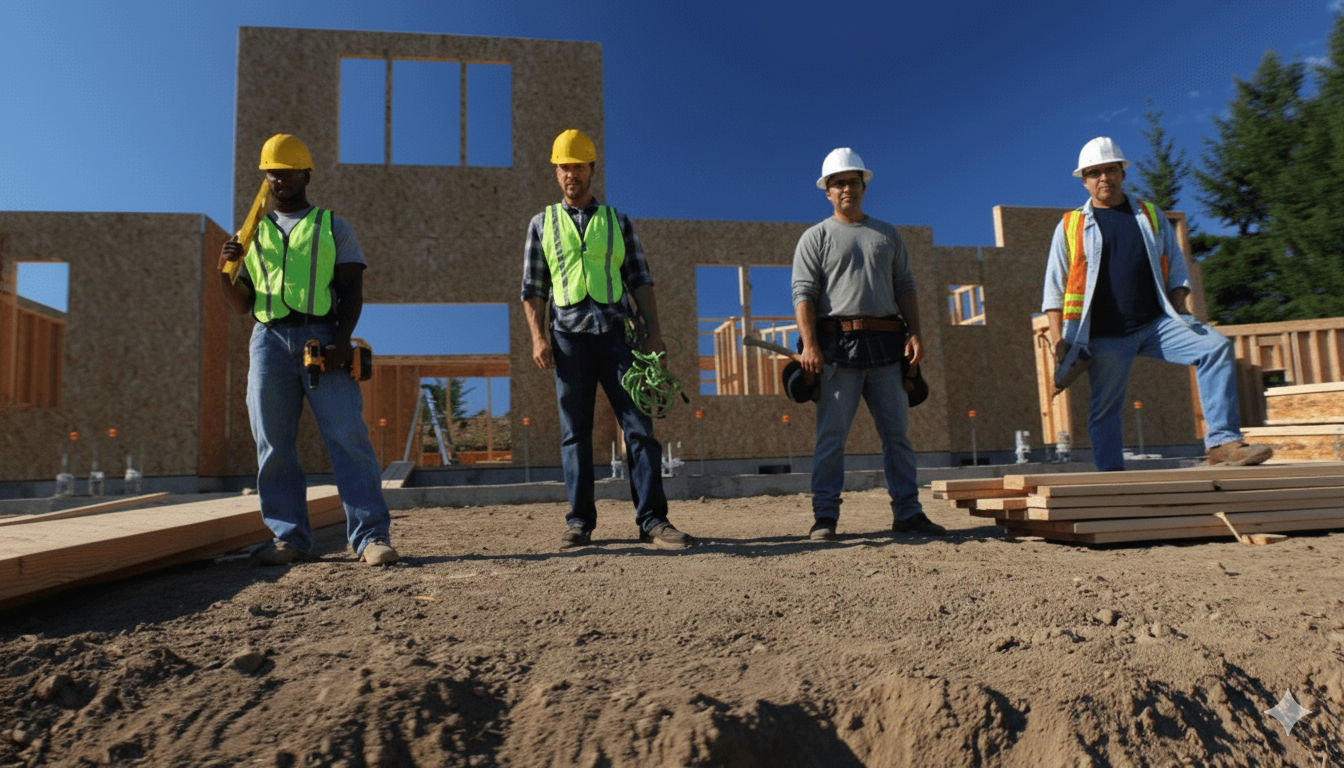

In [11]:
#original image
from IPython.display import Image, display
import os

path = "./ppe-inference-missingvest.png"
if os.path.exists(path):
    display(Image(path, width=600))
else:
    print(f"Image not found: {path}")

## Predict

YOLO11 can be used from the command line with the `yolo` CLI command for various tasks. It supports additional arguments (e.g., imgsz=640). See a full list of available [yolo arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLO11 Predict Docs](https://docs.ultralytics.com/modes/train/).

In [7]:
model.trainer.save_dir

PosixPath('/home/kperkins411/471_code/week7/runs/detect/train7')

In [ ]:
# Load fine tuned model
modelp = YOLO(f"{model.trainer.save_dir}/weights/best.pt")  # load a fine-tuned model

# Inference using the model (img/video/stream)
prediction_results = modelp.predict("./ppe-inference-missingvest.png", save=True, classes=[0, 2, 4, 6])  # Only detect person, helmet, vest, goggles
# !wget https://raw.githubusercontent.com/CNUClasses/471_code/master/week7/ppe-inference-missingvest.png
# prediction_results = modelp.predict("https://raw.githubusercontent.com/CNUClasses/471_code/master/week7/ppe-inference-missingvest.png", save=True, classes=[0, 2, 4, 6])  # Only detect person, helmet, vest, goggles

image 1/1 /home/kperkins411/471_code/week7/ppe-inference-missingvest.png: 384x640 5 helmets, 2 vests, 4 Persons, 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /home/kperkins411/471_code/week7/runs/detect/predict12


## <mark> Image with YOLO classes and bounding boxes

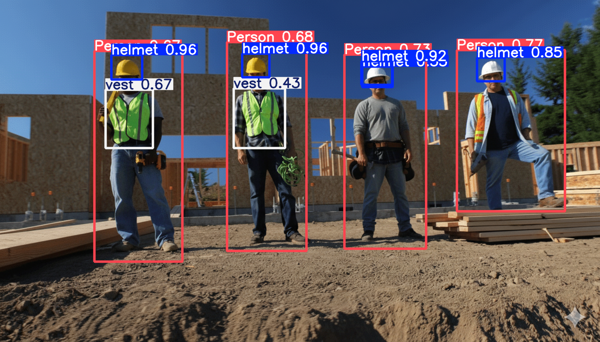

In [13]:
from PIL import Image
from IPython.display import display

# get first prediction result and render annotated image
r = prediction_results[0]
annot_bgr = r.plot()              # BGR numpy array
annot_rgb = annot_bgr[..., ::-1]  # convert to RGB

# convert to PIL Image and display
img = Image.fromarray(annot_rgb)
# resize to width=600 while preserving aspect ratio, then display
w = 600
h = int(img.height * (w / img.width))
img_resized = img.resize((w, h))
display(img_resized)

## <mark> What if you want to rat out all the people not wearing vests?

In [14]:
from ultralytics import YOLO
import numpy as np


boxes = r.boxes
xyxy = boxes.xyxy.cpu().numpy()             # (N,4) [x1,y1,x2,y2]
cls  = boxes.cls.cpu().numpy().astype(int)  # (N,)
conf = boxes.conf.cpu().numpy()             # (N,)

names = r.names    # {id: "name"} mapping
# Find the class ids (robust even if your model's indices differ)
person_id = [k for k,v in names.items() if v.lower() == "person"][0]
vest_id   = [k for k,v in names.items() if "vest" in v.lower()][0]

# 2) get just the people and vests
person_inds = np.where(cls == person_id)[0]
vest_inds   = np.where(cls == vest_id)[0]

persons = xyxy[person_inds]   # (P,4)
vests   = xyxy[vest_inds]     # (V,4)

def iou_matrix(A, B):
    """A: (M,4), B: (N,4) in xyxy -> returns (M,N) IoU"""
    if len(A) == 0 or len(B) == 0:
        return np.zeros((len(A), len(B)), dtype=np.float32)
    Ax1, Ay1, Ax2, Ay2 = A[:,0,None], A[:,1,None], A[:,2,None], A[:,3,None]
    Bx1, By1, Bx2, By2 = B[None,:,0], B[None,:,1], B[None,:,2], B[None,:,3]
    inter_w = np.maximum(0, np.minimum(Ax2, Bx2) - np.maximum(Ax1, Bx1))
    inter_h = np.maximum(0, np.minimum(Ay2, By2) - np.maximum(Ay1, By1))
    inter   = inter_w * inter_h
    areaA   = (Ax2 - Ax1) * (Ay2 - Ay1)
    areaB   = (Bx2 - Bx1) * (By2 - By1)
    union   = areaA + areaB - inter
    return np.where(union > 0, inter/union, 0.0)

# 3) compute best-vest IoU per person
iou_thr = 0.01  # try 0.2–0.3  pretty much any overlap means they are wearing a vest
if len(persons) > 0:
    ious = iou_matrix(persons, vests)  # (P,V), empty if no vests
    best_iou = ious.max(axis=1) if ious.size else np.zeros(len(persons))
else:
    best_iou = np.array([])

# 4) flag people with no vest overlap
no_vest_mask = best_iou < iou_thr
people_without_vests = person_inds[no_vest_mask]  # indices into r.boxes

print("Names mapping:", names)
print("Person detections:", len(person_inds)," with indices", person_inds, "| Vest detections:", len(vest_inds))
print("People without vests (indices in r.boxes):", people_without_vests.tolist())


Names mapping: {0: 'helmet', 1: 'gloves', 2: 'vest', 3: 'boots', 4: 'goggles', 5: 'none', 6: 'Person', 7: 'no_helmet', 8: 'no_goggle', 9: 'no_gloves', 10: 'no_boots'}
Person detections: 4  with indices [4 5 6 7] | Vest detections: 2
People without vests (indices in r.boxes): [4, 5]


## <mark> Bounding Box just the people without vests

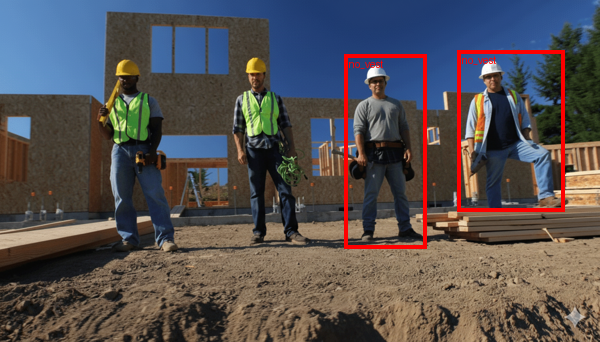

In [15]:
from PIL import ImageDraw
from IPython.display import display

# Display only people_without_vests on the image
inds = people_without_vests  # indices into xyxy / r.boxes

if len(inds) == 0:
    print("No people without vests detected.")
else:
    # start from original image and resize same as earlier
    orig = r.orig_img  # numpy array (H, W, 3)
    orig = orig[..., ::-1]  # convert BGR to RGB
    pil = Image.fromarray(orig)  # convert to RGB
    w = 600
    h = int(pil.height * (w / pil.width))
    pil_small = pil.resize((w, h))

    draw = ImageDraw.Draw(pil_small)
    boxes_to_draw = xyxy[inds]  # (N,4) numpy array

    sx = w / pil.width
    sy = h / pil.height

    for box in boxes_to_draw:
        x1, y1, x2, y2 = box
        x1s, y1s, x2s, y2s = x1 * sx, y1 * sy, x2 * sx, y2 * sy
        draw.rectangle([x1s, y1s, x2s, y2s], outline="red", width=4)
        draw.text((x1s + 4, y1s + 4), "no_vest", fill="red")

    display(pil_small)

## <mark> Lets strip out just the people who dont have the right PPE

Can run these images through a further stage to identify them

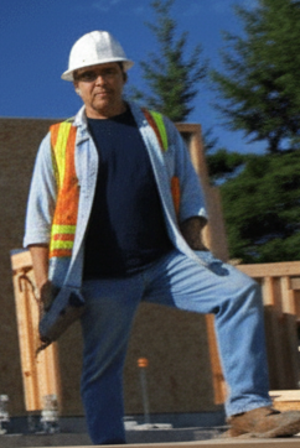

Saved: /tmp/no_vest_person_0_box4.png


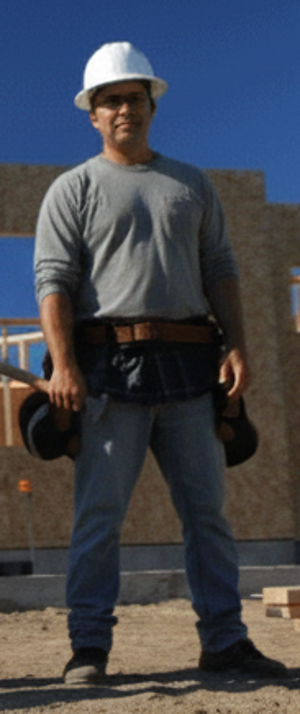

Saved: /tmp/no_vest_person_1_box5.png


In [16]:
# Crop & display people without vests (uses existing variables: pil, xyxy, people_without_vests)
inds = people_without_vests  # indices into xyxy / r.boxes

if len(inds) == 0:
    print("No people without vests detected.")
else:
    for i, idx in enumerate(inds):
        x1, y1, x2, y2 = xyxy[int(idx)].astype(int)
        # clip to image bounds
        x1 = max(0, min(x1, pil.width - 1))
        x2 = max(0, min(x2, pil.width))
        y1 = max(0, min(y1, pil.height - 1))
        y2 = max(0, min(y2, pil.height))

        crop = pil.crop((x1, y1, x2, y2))
        # resize to a reasonable display width while keeping aspect ratio
        display_w = 300
        display_h = int(crop.height * (display_w / crop.width))
        crop_resized = crop.resize((display_w, display_h))

        display(crop_resized)

        # optionally save crops for later processing
        out_path = f"/tmp/no_vest_person_{i}_box{int(idx)}.png"
        crop.save(out_path)
        print(f"Saved: {out_path}")

## Citation,License and Attribution

```bibtex
@dataset{Dalvi_Construction_PPE_Dataset_2025,
    author = {Mrunmayee Dalvi and Niyati Singh and Sahil Bhingarde and Ketaki Chalke},
    title = {Construction-PPE: Personal Protective Equipment Detection Dataset},
    month = {January},
    year = {2025},
    version = {1.0.0},
    license = {AGPL-3.0},
    url = {https://docs.ultralytics.com/datasets/detect/construction-ppe/},
    publisher = {Ultralytics}
}
```
